In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as d

#bigger fonts
import matplotlib
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15)
matplotlib.rcParams.update({'font.size': 20})

# Read a baby

In [4]:
data = pd.read_csv("../TOST_data/TOST FMC Data Groomed/G_FMC 002/G_FMC002_Day1_Rt wrist.csv")
data

,Date,Time,SpO2,PR,PI,Exceptions,Exception Labels,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,03-03-14,14:55:57,98,125,0.8,8000,SET,NaN,NaN,NaN
1,03-03-14,14:55:59,97,125,1.2,8000,SET,NaN,NaN,NaN
2,03-03-14,14:56:01,95,125,1.3,8000,SET,NaN,NaN,NaN
3,03-03-14,14:56:03,95,130,1.3,8000,SET,NaN,NaN,NaN
4,03-03-14,14:56:05,95,129,1.3,8000,SET,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2263,03-03-14,16:11:23,96,130,3.7,8000,SET,NaN,NaN,NaN
2264,03-03-14,16:11:25,96,130,3.7,8000,SET,NaN,NaN,NaN
2265,03-03-14,16:11:27,96,128,3.7,8000,SET,NaN,NaN,NaN
2266,03-03-14,16:11:29,96,127,2.5,8000,SET,NaN,NaN,NaN


In [7]:
data_essential = pd.read_csv("../TOST_data/TOST FMC Data Groomed/G_FMC 002/G_FMC002_Day1_Rt wrist.csv",skipinitialspace=True,usecols=['Date','Time','SpO2','PR','PI'])
data_essential

,Date,Time,SpO2,PR,PI
0,03-03-14,14:55:57,98,125,0.8
1,03-03-14,14:55:59,97,125,1.2
2,03-03-14,14:56:01,95,125,1.3
3,03-03-14,14:56:03,95,130,1.3
4,03-03-14,14:56:05,95,129,1.3
...,...,...,...,...,...
2263,03-03-14,16:11:23,96,130,3.7
2264,03-03-14,16:11:25,96,130,3.7
2265,03-03-14,16:11:27,96,128,3.7
2266,03-03-14,16:11:29,96,127,2.5


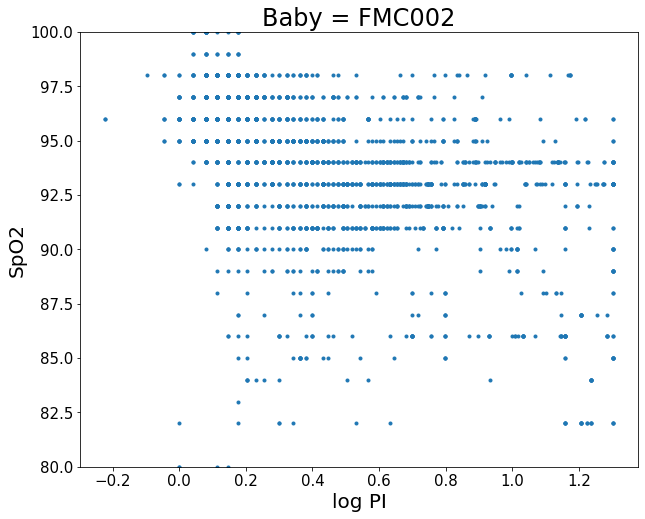

In [37]:
plt.figure(figsize=(10,8))
plt.plot(np.log10(data['PI']),data['SpO2'],".")
plt.xlabel('log PI')
plt.ylabel('SpO2')
plt.ylim(80,100)
plt.title('Baby = FMC002')
plt.show()

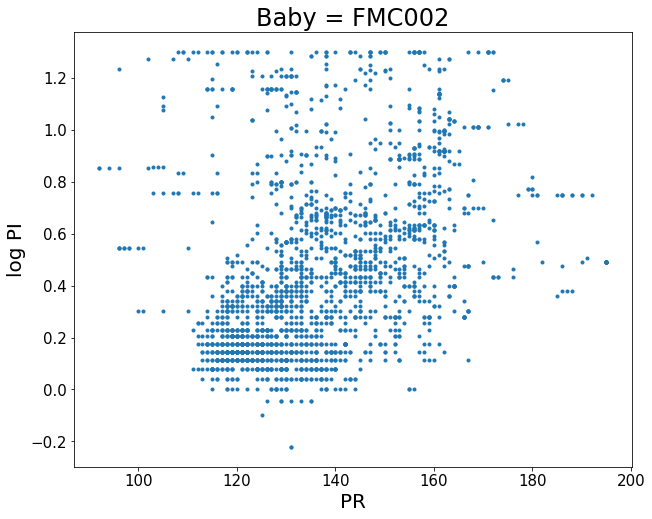

In [38]:
plt.figure(figsize=(10,8))
plt.plot(data['PR'],np.log10(data['PI']),".")
#plt.xlim(80,100)
plt.xlabel('PR')
plt.ylabel('log PI')
plt.title('Baby = FMC002')
plt.show()

In [39]:
data['Exception Labels'].unique()

array(['SET', 'LowSpO2SIQ', 'Alarm'], dtype=object)

In [40]:
def DELTA_TIMES_SEC(DATE1,TIME1,DATE2,TIME2,verbose=False,fmt='american'):
    
    def format_date(DATE='03-03-14',fmt=fmt):
        # !!! American format
        if fmt=='american':
            month = int(DATE[0:2])
            day = int(DATE[3:5])
        else:
            day = int(DATE[0:2])
            month = int(DATE[3:5])

        year = int('20'+DATE[6:8])
        return year, month, day

    def format_time(TIME='14:55:57'):
        hours = int(TIME[0:2])
        minutes = int(TIME[3:5])
        seconds = int(TIME[6:8])
        return hours, minutes, seconds

    
    year_1,month_1,day_1       = format_date(DATE1)
    hour_1,minutes_1,seconds_1 = format_time(TIME1)

    year_2,month_2,day_2       = format_date(DATE2)
    hour_2,minutes_2,seconds_2 = format_time(TIME2)

    #compute day difference
    from datetime import date
    start = date(year_1, month_1, day_1)
    end   = date(year_2, month_2, day_2)
    delta_days = (end-start).days
    if verbose:
        print('delta_days = ',delta_days)

    time_1_sec = hour_1*60*60 + minutes_1*60 + seconds_1
    time_2_sec = hour_2*60*60 + minutes_2*60 + seconds_2
    delta_time_sec = (time_2_sec-time_1_sec)
    if verbose:
        print('delta_sec = ', delta_time_sec)

    delta_tot_sec = delta_days*24*60*60 + (time_2_sec-time_1_sec)
    return delta_tot_sec

In [41]:
DELTA_TIMES_SEC('03-03-14','14:55:57','03-03-14','16:11:31')

4534

In [42]:
# turning the variables date and time into delta_times 
# which are the second elapsed since the beginning of recording
data_0 = data['Date'][0]
time_0 = data['Time'][0]
delta_times =np.zeros(len(data))
for i in range(0,len(data['Time'])):
    #print(data['Time'][i],data['Time'][i])
    print(DELTA_TIMES_SEC(data_0,time_0,data['Date'][i],data['Time'][i]))
    #print(DELTA_TIMES_SEC(data['Date'][i-1],data['Time'][i-1],data['Date'][i],data['Time'][i]))
    delta_times[i] = DELTA_TIMES_SEC(data_0,time_0,data['Date'][i],data['Time'][i])
    

0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248
250
252
254
256
258
260
262
264
266
268
270
272
274
276
278
280
282
284
286
288
290
292
294
296
298
300
302
304
306
308
310
312
314
316
318
320
322
324
326
328
330
332
334
336
338
340
342
344
346
348
350
352
354
356
358
360
362
364
366
368
370
372
374
376
378
380
382
384
386
388
390
392
394
396
398
400
402
404
406
408
410
412
414
416
418
420
422
424
426
428
430
432
434
436
438
440
442
444
446
448
450
452
454
456
458
460
462
464
466
468
470
472
474
476
478
480
482
484
486
488
490
492
494
496
498
500
502
504
506
508
510
512
514
516
518
520
522
524
526

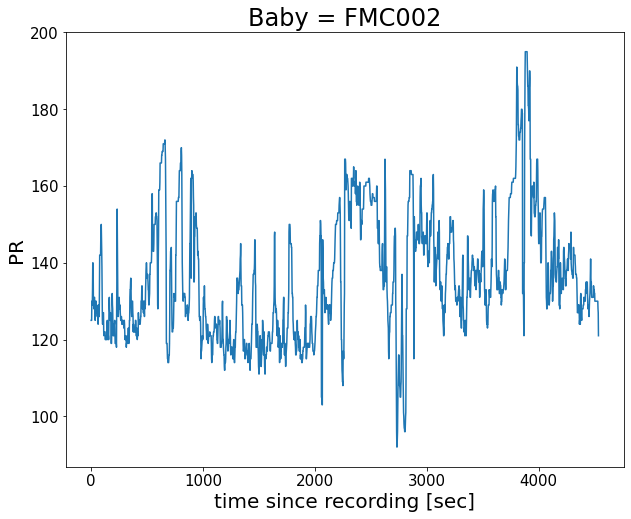

In [43]:
plt.figure(figsize=(10,8))
plt.plot(delta_times,data['PR'])
plt.xlabel('time since recording [sec]')
plt.ylabel('PR')
plt.title('Baby = FMC002')
plt.show()

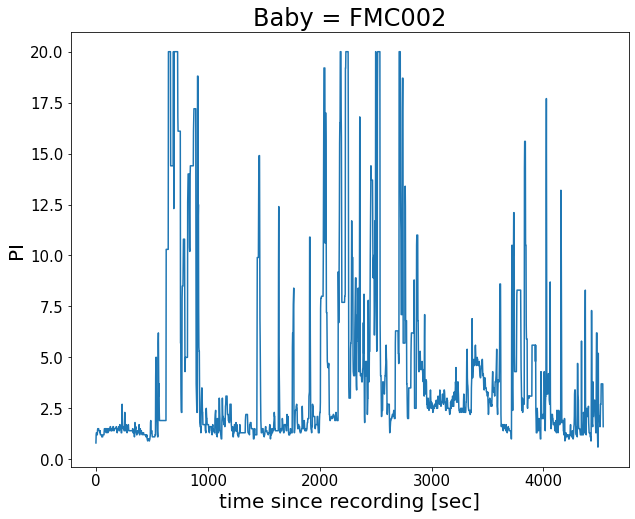

In [44]:
plt.figure(figsize=(10,8))
plt.plot(delta_times,data['PI'])
plt.xlabel('time since recording [sec]')
plt.ylabel('PI')
plt.title('Baby = FMC002')
plt.show()

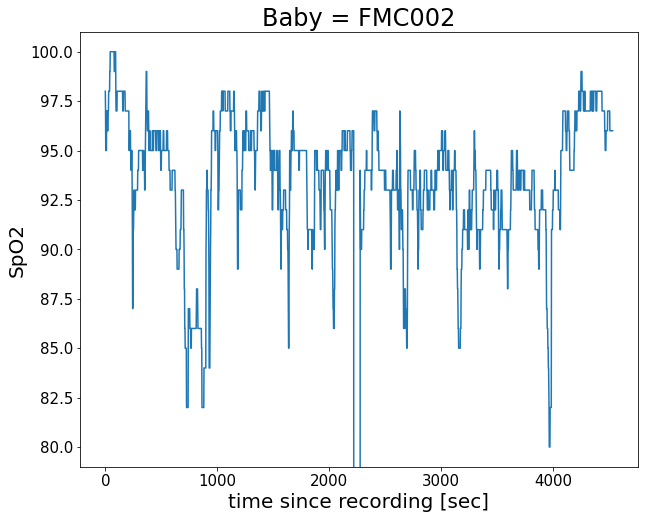

In [45]:
plt.figure(figsize=(10,8))
plt.plot(delta_times,data['SpO2'])
plt.ylim(79,101)
plt.xlabel('time since recording [sec]')
plt.ylabel('SpO2')
plt.title('Baby = FMC002')
plt.show()

# Some histograms

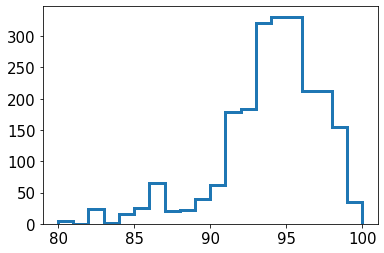

In [46]:
plt.hist(data['SpO2'],range=(80,100),bins=20,histtype='step',lw=3,density=False)
plt.show()

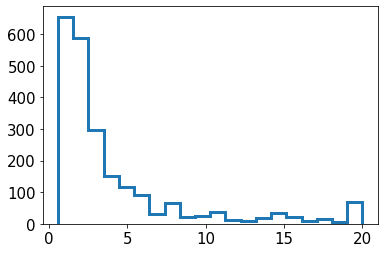

In [47]:
plt.hist(data['PI'],bins=20,histtype='step',lw=3,density=False)
plt.show()

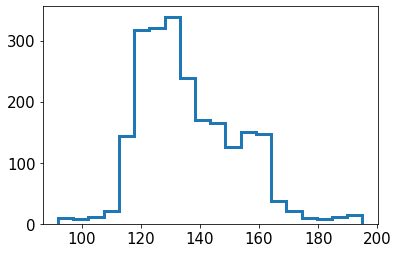

In [48]:
plt.hist(data['PR'],bins=20,histtype='step',lw=3,density=False)
plt.show()

# Read big table Durham with properties of babies

In [139]:
babies = pd.read_excel("../TOST_data/TOST_State_Durham.xlsx")
babies[0:3]

,Unnamed: 0,Study Number (Original),Date & Time of Birth,Gender,Birth Weight in Grams,Gestational Age in weeks,Gestational Age (additional days),Ethinicity,Type of delivery,Type of Resuscitation (choice=Routine),...,Active Alert Onset Time 3,Active alert End time 3,Active alert (Time),Crying Onset Time 1,Crying End Time 1,Crying Onset Time 2,Crying End Time 2,Crying Onset Time 3,Crying End Time 3,Crying (Time)
0,NaN,FMC003,2014-03-03 18:25:00,Male,3775.0,40.0,0.0,White,vaginal,Checked,...,NaT,NaT,NaN,NaT,NaT,NaT,NaT,NaT,NaT,NaN
1,NaN,FMC004,2014-03-03 17:51:00,Male,3420.0,39.0,6.0,Others,vaginal,Checked,...,NaT,NaT,NaN,NaT,NaT,NaT,NaT,NaT,NaT,NaN
2,NaN,FMC005,2014-03-03 13:17:00,Female,3510.0,39.0,0.0,East Indian,Csection,Checked,...,NaT,NaT,NaN,NaT,NaT,NaT,NaT,NaT,NaT,NaN


In [150]:
index = list(babies['Study Number (Original)']).index('FMC005')
babies['Gender'][index]

'Female'

In [54]:
print(babies['Study Number (Original)'].unique())
len(babies['Study Number (Original)'].unique())

['FMC003' 'FMC004' 'FMC005' 'FMC006' 'FMC007' 'FMC008' 'RGH001' nan
 'RGH002' 'RGH003' 'PLC001' 'PLC002' 'FMC009' 'FMC010' 'FMC011' 'FMC012'
 'FMC013' 'PLC003' 'PLC004' 'PLC005' 'RGH004' 'RGH005' 'FMC014' 'FMC015'
 'FMC016' 'FMC017' 'FMC018' 'FMC019' 'FMC020' 'FMC021' 'FMC022' 'FMC023'
 'FMC024' 'FMC025' 'PLC006' 'PLC007' 'PLC008' 'FMC026' 'FMC027' 'FMC028'
 'FMC029' 'FMC030' 'FMC031' 'FMC032' 'FMC033' 'FMC034' 'FMC035' 'FMC036'
 'FMC037' 'FMC038' 'PLC 009' 'FMC039' 'FMC040' 'PLC 010' 'FMC041' 'FMC042'
 'PLC 011' 'PLC 012' 'FMC043' 'FMC044' 'FMC045' 'PLC 013' 'FMC046'
 'FMC047' 'FMC048' 'FMC049' 'PLC 014' 'PLC 015' 'PLC 016' 'FMC050'
 'FMC051' 'FMC052' 'PLC017' 'PLC 018' 'PLC 019' 'RGH006' 'RGH007' 'RGH008'
 'RGH009' 'PLC 020' 'PLC 021' 'FMC053' 'FMC054' 'FMC055' 'FMC056' 'FMC057'
 'FMC058' 'FMC059' 'FMC060' 'FMC061' 'FMC062' 'RGH010' 'FMCO63' 'RGH012'
 'PLC022' 'PLC023' 'FMC064' 'RGH013' 'RGH014' 'FMC065' 'RGH011' 'FMC066'
 'RGH015' 'RGH016' 'RGH017' 'RGH018' 'FMC067' 'FMC068' 'FMC069

294

In [55]:
babies.columns.values

array(['Unnamed: 0', 'Study Number (Original)', 'Date & Time of Birth',
       'Gender', 'Birth Weight in Grams', 'Gestational Age in weeks',
       'Gestational Age (additional days)', 'Ethinicity',
       'Type of delivery', 'Type of Resuscitation (choice=Routine)',
       'Type of Resuscitation (choice=Free flow oxygen)',
       'Type of Resuscitation (choice=CPAP on Room air)',
       'Type of Resuscitation (choice=CPAP with Oxygen)',
       'Type of Resuscitation (choice=PPV on Room air)',
       'Type of Resuscitation (choice=PPV with Oxygen)',
       'Type of Resuscitation (choice=Naloxone injection)',
       'Type of Resuscitation (choice=Others)', 'Meconium Stained Liqor',
       'Intubation Needed', 'Total Apgar score @ 1min',
       'Total Apgar score @ 5min',
       'FINAL NEONATAL STATE  (Please assign the state if you marked yes for > 3 factors, each baby can have MORE THAN ONE state assigned, if the infant persist in that state>10sec). (choice=Quiet sleep)',
       'FINA

In [56]:
class baby:
    def __init__(self,baby_id):
        '''Provide the study number to initialise a baby, e.g. baby_id="FMC003" '''
        self.file_name = "../TOST_data/TOST_State_Durham.xlsx"
        self.table = pd.read_excel(self.file_name)
        self.baby_ids = self.table['Study Number (Original)']
        
        

In [20]:
baby('FMC003')

# Function to search for a key in the name of the files in a folder

In [91]:
def find_files_in_folder(key ,folder='/home/giorgio/Desktop/NHS/TOST_data/',verbose=False):
    '''give the key you want to find in file names contained in folder. If you want to list all the files set key=""  '''
    import subprocess
    ls = subprocess.Popen(['ls','', folder],
           stdout=subprocess.PIPE, 
           stderr=subprocess.STDOUT)
    ls_out,ls_err = ls.communicate()
    ls_out = str(ls_out)
    ls_out = ls_out.split('\\n')
    found=False
    key_lines = []
    if key=='*':
        if ':' in ls_out[1]:
            key_lines = ls_out[2:-1] #neglect parent folder
        else:
            key_lines = ls_out[1:-1] #neglect the first apostrophy

    else:
        for line in ls_out:
            if key in line and ':' not in line: #the ':' appears in the parent folder
                key_lines.append(line)
                found=True
        if (found and verbose):
            for kl in key_lines:
                print(kl)
        elif verbose:
                print('No file names with the key: ',key)
    return key_lines

In [94]:
home_NHS ='/home/giorgio/Desktop/NHS/TOST_data/'

list_FMC_PHN_files = find_files_in_folder(key='FMC ',
                                          folder=home_NHS+'TOST FMC Data Groomed/',
                                          verbose=False)
#list_FMC_files_single = find_files_in_folder(key="FMC ",
#                                          folder=home_NHS+'TOST FMC Data Groomed/',
#                                          verbose=False)

print(len(list_FMC_PHN_files))#,list_FMC_files_single)

62


In [124]:
def get_folder_for_baby(baby_id,verbose=True):
    home_NHS ='/home/giorgio/Desktop/NHS/TOST_data/'
    if 'FMC' in baby_id:
        folder = home_NHS + 'TOST FMC Data Groomed/'
    elif 'PLC' in baby_id:
        folder = home_NHS + 'TOST PLC Data Groomed/'
    elif 'RGH' in baby_id:
        folder = home_NHS + 'TOST RGH Data Groomed/'
    ls = find_files_in_folder(key=baby_id[-3:],folder=folder,verbose=False)
    
    if verbose:
        if len(ls)>1:
            print('WARNING: there are more occurrence for that baby id')
            print(ls)
            print('the first occurrence will be used: ',ls[0])
        elif len(ls)==0:
            print('It seems there are no data for ',baby_id)
            ls=None
    
    folder = folder + ls[0] + '/'
    return folder

In [125]:
get_folder_for_baby('RGH 001')

'/home/giorgio/Desktop/NHS/TOST_data/TOST RGH Data Groomed/G_RGH_PHN_001/'

In [137]:
def list_files_for_baby(baby_id,whole_path=True):
    f = get_folder_for_baby(baby_id,verbose=False)
    ls = find_files_in_folder(key='*',folder=f)
    if whole_path:
        for i in range(len(ls)):
            ls[i] = f + ls[i]
    return ls

In [138]:
list_files_for_baby('FMC001',whole_path=True)

['/home/giorgio/Desktop/NHS/TOST_data/TOST FMC Data Groomed/G_FMC_PHN_001/G_FMC001_Day1_Rt foot.csv',
 '/home/giorgio/Desktop/NHS/TOST_data/TOST FMC Data Groomed/G_FMC_PHN_001/G_FMC001_Day1_Rt wrist.csv',
 '/home/giorgio/Desktop/NHS/TOST_data/TOST FMC Data Groomed/G_FMC_PHN_001/G_PHN_FMC001_Day4_Rt wrist.csv',
 '/home/giorgio/Desktop/NHS/TOST_data/TOST FMC Data Groomed/G_FMC_PHN_001/G_PHN_FMC001_Day5_Lt Foot.csv']

In [23]:
#for directory in list_FMC_PHN_files:
#    print(directory)

In [24]:
find_files_in_folder(key='Day',folder=home_NHS+'TOST FMC Data Groomed/'+list_FMC_PHN_files[0])

['G_FMC001_Day1_Rt foot.csv',
 'G_FMC001_Day1_Rt wrist.csv',
 'G_PHN_FMC001_Day4_Rt wrist.csv',
 'G_PHN_FMC001_Day5_Lt Foot.csv']

In [25]:
list_FMC_PHN_files[0]

'G_FMC_PHN_001'

In [26]:
FMC001 = pd.read_csv(home_NHS+'TOST FMC Data Groomed/'+list_FMC_PHN_files[0]+'/G_FMC001_Day1_Rt foot.csv')

In [27]:
FMC001_Day5 = pd.read_csv(home_NHS+'TOST FMC Data Groomed/'+list_FMC_PHN_files[0]+'/G_PHN_FMC001_Day5_Lt Foot.csv')

In [28]:
FMC001.columns.values

array(['Date', 'Time', 'SpO2', 'PR', 'PI', ' Exceptions',
       'Exception Labels', 'Unnamed: 7'], dtype=object)

In [29]:
def convert_dates_times_into_deltasec(dates,times,fmt='american'):
    delta_sec =np.zeros(len(dates))
    for i in range(0,len(times)):
        delta_sec[i] = DELTA_TIMES_SEC(dates[0],times[0],dates[i],times[i],fmt=fmt)
        #print(delta_sec)
    return delta_sec

In [30]:
delta_sec_FMC001 = convert_dates_times_into_deltasec(FMC001['Date'],FMC001['Time'],fmt='UK')

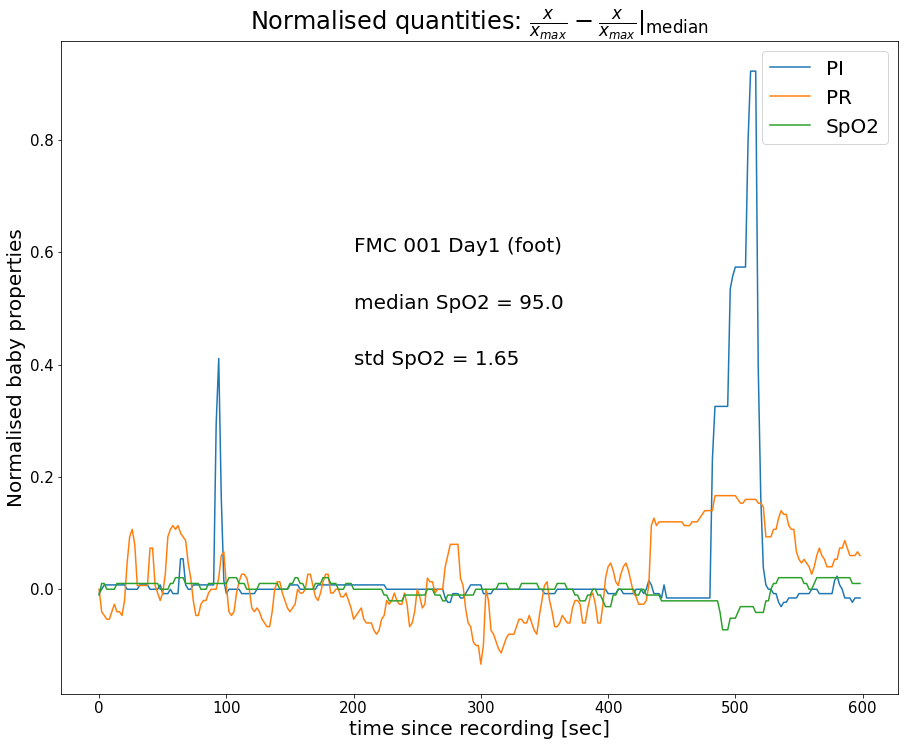

In [33]:
plt.figure(figsize=(15,12))
PI_norm =FMC001['PI']/FMC001['PI'].max()
PR_norm =FMC001['PR']/FMC001['PR'].max()
SpO2_norm =FMC001['SpO2']/FMC001['SpO2'].max()

plt.plot(delta_sec_FMC001,PI_norm-PI_norm.median(),label='PI')
plt.plot(delta_sec_FMC001,PR_norm-PR_norm.median(),label='PR')
plt.plot(delta_sec_FMC001,SpO2_norm-SpO2_norm.median(),label='SpO2')
plt.title(r'Normalised quantities: $\frac{x}{x_{max}} - \left. \frac{x}{x_{max}} \right|_{\rm{median}}$')
plt.xlabel('time since recording [sec]')
plt.ylabel('Normalised baby properties')
plt.legend()
plt.text(200,0.6,"FMC 001 Day1 (foot)")
plt.text(200,0.5,"median SpO2 = "+str(FMC001['SpO2'].median()))
plt.text(200,0.4,"std SpO2 = "+str(round(FMC001['SpO2'].std(),2)))
plt.savefig("../plots/001/FMC001_normed_day1_foot.png")
plt.show()

In [127]:
for t in FMC001['Time']:
    print(t)

12:41:52
12:41:54
12:41:56
12:41:58
12:42:00
12:42:02
12:42:04
12:42:06
12:42:08
12:42:10
12:42:12
12:42:14
12:42:16
12:42:18
12:42:20
12:42:22
12:42:24
12:42:26
12:42:28
12:42:30
12:42:32
12:42:34
12:42:36
12:42:38
12:42:40
12:42:42
12:42:44
12:42:46
12:42:48
12:42:50
12:42:52
12:42:54
12:42:56
12:42:58
12:43:00
12:43:02
12:43:04
12:43:06
12:43:08
12:43:10
12:43:12
12:43:14
12:43:16
12:43:18
12:43:20
12:43:22
12:43:24
12:43:26
12:43:28
12:43:30
12:43:32
12:43:34
12:43:36
12:43:38
12:43:40
12:43:42
12:43:44
12:43:46
12:43:48
12:43:50
12:43:52
12:43:54
12:43:56
12:43:58
12:44:00
12:44:02
12:44:04
12:44:06
12:44:08
12:44:10
12:44:12
12:44:14
12:44:16
12:44:18
12:44:20
12:44:22
12:44:24
12:44:26
12:44:28
12:44:30
12:44:32
12:44:34
12:44:36
12:44:38
12:44:40
12:44:42
12:44:44
12:44:46
12:44:48
12:44:50
12:44:52
12:44:54
12:44:56
12:44:58
12:45:00
12:45:02
12:45:04
12:45:06
12:45:08
12:45:10
12:45:12
12:45:14
12:45:16
12:45:18
12:45:20
12:45:22
12:45:24
12:45:26
12:45:28
12:45:30
12:45:32
1

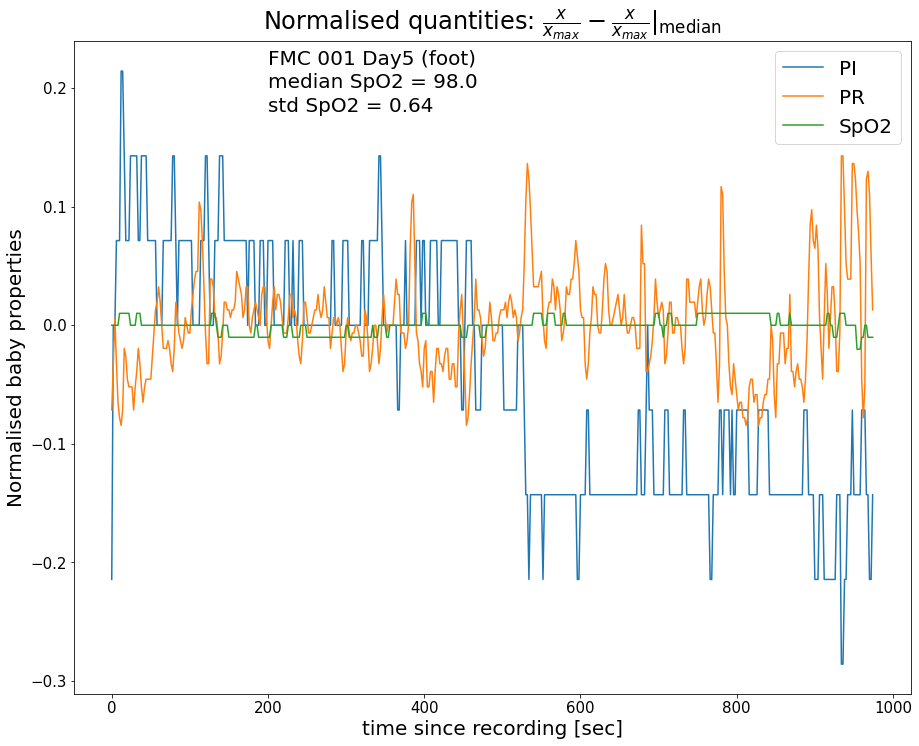

In [34]:
delta_sec_FMC001_Day5 = convert_dates_times_into_deltasec(FMC001_Day5['Date'],FMC001_Day5['Time'],fmt='UK')

plt.figure(figsize=(15,12))
PI_norm_Day5 =FMC001_Day5['PI']/FMC001_Day5['PI'].max()
PR_norm_Day5 =FMC001_Day5['PR']/FMC001_Day5['PR'].max()
SpO2_norm_Day5 =FMC001_Day5['SpO2']/FMC001_Day5['SpO2'].max()

plt.plot(delta_sec_FMC001_Day5,PI_norm_Day5  - PI_norm_Day5.median(),label='PI')
plt.plot(delta_sec_FMC001_Day5,PR_norm_Day5  - PR_norm_Day5.median(),label='PR')
plt.plot(delta_sec_FMC001_Day5,SpO2_norm_Day5- SpO2_norm_Day5.median(),label='SpO2')
plt.title(r'Normalised quantities: $\frac{x}{x_{max}} - \left. \frac{x}{x_{max}} \right|_{\rm{median}}$')
plt.xlabel('time since recording [sec]')
plt.ylabel('Normalised baby properties')
plt.legend()
plt.text(200,0.22,"FMC 001 Day5 (foot)")
plt.text(200,0.2,"median SpO2 = "+str(FMC001_Day5['SpO2'].median()))
plt.text(200,0.18,"std SpO2 = "+str(round(FMC001_Day5['SpO2'].std(),2)))
plt.savefig("../plots/001/FMC001_normed_day5_foot.png")
plt.show()

In [132]:
delta_sec_FMC001_Day5

array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,
        22.,  24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,
        44.,  46.,  48.,  50.,  52.,  54.,  56.,  58.,  60.,  62.,  64.,
        66.,  68.,  70.,  72.,  74.,  76.,  78.,  80.,  82.,  84.,  86.,
        88.,  90.,  92.,  94.,  96.,  98., 100., 102., 104., 106., 108.,
       110., 112., 114., 116., 118., 120., 122., 124., 126., 128., 130.,
       132., 134., 136., 138., 140., 142., 144., 146., 148., 150., 152.,
       154., 156., 158., 160., 162., 164., 166., 168., 170., 172., 174.,
       176., 178., 180., 182., 184., 186., 188., 190., 192., 194., 196.,
       198., 200., 202., 204., 206., 208., 210., 212., 214., 216., 218.,
       220., 222., 224., 226., 228., 230., 232., 234., 236., 238., 240.,
       242., 244., 246., 248., 250., 252., 254., 256., 258., 260., 262.,
       264., 266., 268., 270., 272., 274., 276., 278., 280., 282., 284.,
       286., 288., 290., 292., 294., 296., 298., 30